In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anaemia-prediction/output.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/anaemia-prediction/output.csv')

In [4]:
df.shape

(104, 7)

In [5]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [6]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [7]:
df['Sex'].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

In [8]:
def gender(l):
    for i in range(len(l)):
        if l[i]=='F ' or l[i]=='F':
            return 'F'
        else:
            return 'M'

In [9]:
df['Sex']=df['Sex'].map(gender)

In [10]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [11]:
df=pd.get_dummies(df,columns=['Sex'])

In [12]:
df

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_F,Sex_M
0,1,43.2555,30.8421,25.9025,6.3,Yes,False,True
1,2,45.6033,28.1900,26.2067,13.5,No,True,False
2,3,45.0107,28.9677,26.0215,11.7,No,True,False
3,4,44.5398,28.9899,26.4703,13.5,No,True,False
4,5,43.2870,30.6972,26.0158,12.4,No,False,True
...,...,...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,Yes,True,False
100,101,42.2324,30.6757,27.0919,6.3,Yes,False,True
101,102,45.6064,31.9084,22.4852,12.7,No,True,False
102,103,45.2095,29.2769,25.5136,13.4,No,False,True


In [13]:
df['Anaemic'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
from sklearn import preprocessing

In [15]:
le=preprocessing.LabelEncoder()
df['Anaemic']=le.fit_transform(df['Anaemic'])
df['Sex_F']=le.fit_transform(df['Sex_F'])
df['Sex_M']=le.fit_transform(df['Sex_M'])

In [16]:
df

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_F,Sex_M
0,1,43.2555,30.8421,25.9025,6.3,1,0,1
1,2,45.6033,28.1900,26.2067,13.5,0,1,0
2,3,45.0107,28.9677,26.0215,11.7,0,1,0
3,4,44.5398,28.9899,26.4703,13.5,0,1,0
4,5,43.2870,30.6972,26.0158,12.4,0,0,1
...,...,...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,1,1,0
100,101,42.2324,30.6757,27.0919,6.3,1,0,1
101,102,45.6064,31.9084,22.4852,12.7,0,1,0
102,103,45.2095,29.2769,25.5136,13.4,0,0,1


In [17]:
df=df.drop('Sex_F',axis='columns')

In [18]:
df

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_M
0,1,43.2555,30.8421,25.9025,6.3,1,1
1,2,45.6033,28.1900,26.2067,13.5,0,0
2,3,45.0107,28.9677,26.0215,11.7,0,0
3,4,44.5398,28.9899,26.4703,13.5,0,0
4,5,43.2870,30.6972,26.0158,12.4,0,1
...,...,...,...,...,...,...,...
99,100,49.9999,29.2860,20.7141,14.5,1,0
100,101,42.2324,30.6757,27.0919,6.3,1,1
101,102,45.6064,31.9084,22.4852,12.7,0,0
102,103,45.2095,29.2769,25.5136,13.4,0,1


In [19]:
df=df.drop('Number',axis='columns')
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_M
0,43.2555,30.8421,25.9025,6.3,1,1
1,45.6033,28.1900,26.2067,13.5,0,0
2,45.0107,28.9677,26.0215,11.7,0,0
3,44.5398,28.9899,26.4703,13.5,0,0
4,43.2870,30.6972,26.0158,12.4,0,1
...,...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,1,0
100,42.2324,30.6757,27.0919,6.3,1,1
101,45.6064,31.9084,22.4852,12.7,0,0
102,45.2095,29.2769,25.5136,13.4,0,1


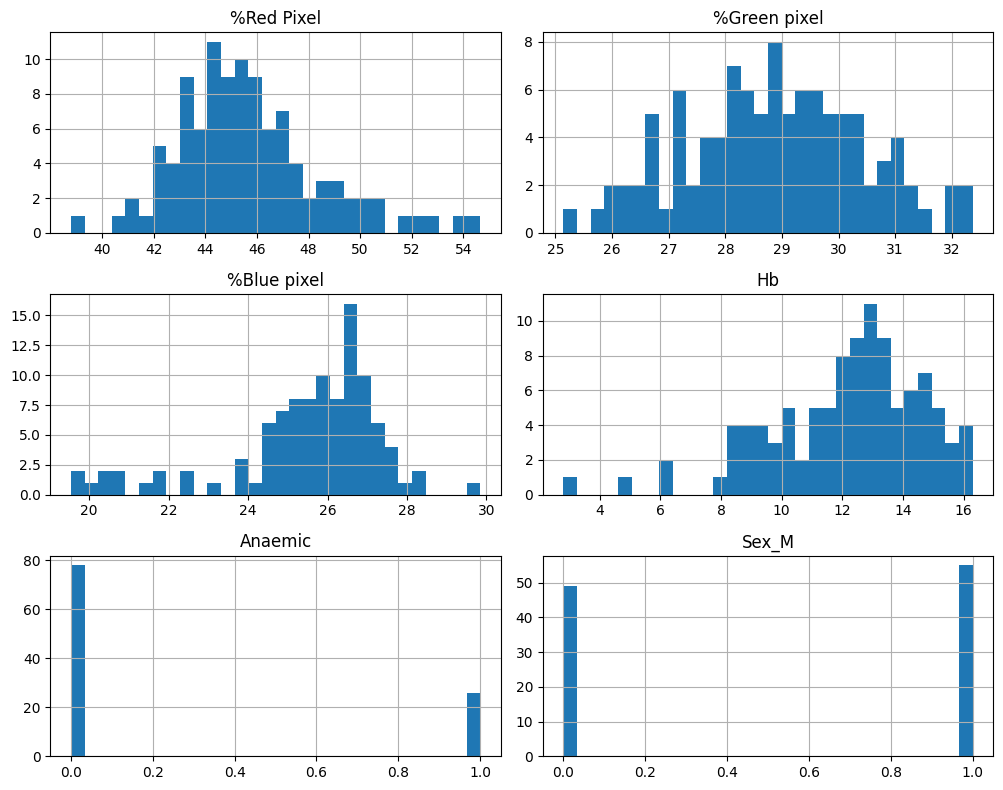

In [20]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [21]:
X=df.iloc[:,[0,1,2,3,5]]

In [22]:
X

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Sex_M
0,43.2555,30.8421,25.9025,6.3,1
1,45.6033,28.1900,26.2067,13.5,0
2,45.0107,28.9677,26.0215,11.7,0
3,44.5398,28.9899,26.4703,13.5,0
4,43.2870,30.6972,26.0158,12.4,1
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,0
100,42.2324,30.6757,27.0919,6.3,1
101,45.6064,31.9084,22.4852,12.7,0
102,45.2095,29.2769,25.5136,13.4,1


In [23]:
df['Hb'].max()

16.3

In [24]:
df['%Red Pixel'].max()

54.6478

In [25]:
Y=df.drop(X,axis='columns')

In [26]:
Y=Y.values

In [27]:
Y[0]

array([1])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [29]:
X_train.shape

(78, 5)

In [30]:
y_train.shape

(78, 1)

In [31]:
y_train

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
import pickle

In [34]:
pickle.dump(sc, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb')) 

In [35]:
X_test[0]

array([-0.42172483, -0.0879538 ,  0.70594973,  0.98274533, -1.10840941])

In [36]:
y_test[0]

array([0])

In [37]:
X_test

array([[-0.42172483, -0.0879538 ,  0.70594973,  0.98274533, -1.10840941],
       [-0.19408746,  0.59012291, -0.21874925, -0.80255912, -1.10840941],
       [-0.21479783,  0.04931538,  0.27837348, -0.1568107 , -1.10840941],
       [ 0.08122618, -1.03082958,  0.76731117,  1.28662694, -1.10840941],
       [ 0.22496181, -0.9870333 ,  0.5147893 , -0.42270711, -1.10840941],
       [ 1.03096986, -1.46732232, -0.2754637 ,  1.32461214,  0.90219371],
       [-1.08947525,  0.77988638,  0.95556723, -0.80255912, -1.10840941],
       [ 1.54848174,  0.24428541, -2.52429189,  0.90677493, -1.10840941],
       [ 1.24722713, -0.37737679, -1.53828428,  0.18505611,  0.90219371],
       [ 0.4680436 , -1.02004896,  0.18004732,  0.45095252,  0.90219371],
       [-0.51513355,  0.43619276,  0.39370342, -0.99248513,  0.90219371],
       [ 2.10699026, -0.37939816, -2.82111862,  0.41296731, -1.10840941],
       [-0.55722579, -0.22712185,  1.02838773, -0.0808403 ,  0.90219371],
       [-0.20147392,  1.35842609, -0.8

In [38]:
X_test

array([[-0.42172483, -0.0879538 ,  0.70594973,  0.98274533, -1.10840941],
       [-0.19408746,  0.59012291, -0.21874925, -0.80255912, -1.10840941],
       [-0.21479783,  0.04931538,  0.27837348, -0.1568107 , -1.10840941],
       [ 0.08122618, -1.03082958,  0.76731117,  1.28662694, -1.10840941],
       [ 0.22496181, -0.9870333 ,  0.5147893 , -0.42270711, -1.10840941],
       [ 1.03096986, -1.46732232, -0.2754637 ,  1.32461214,  0.90219371],
       [-1.08947525,  0.77988638,  0.95556723, -0.80255912, -1.10840941],
       [ 1.54848174,  0.24428541, -2.52429189,  0.90677493, -1.10840941],
       [ 1.24722713, -0.37737679, -1.53828428,  0.18505611,  0.90219371],
       [ 0.4680436 , -1.02004896,  0.18004732,  0.45095252,  0.90219371],
       [-0.51513355,  0.43619276,  0.39370342, -0.99248513,  0.90219371],
       [ 2.10699026, -0.37939816, -2.82111862,  0.41296731, -1.10840941],
       [-0.55722579, -0.22712185,  1.02838773, -0.0808403 ,  0.90219371],
       [-0.20147392,  1.35842609, -0.8

In [39]:
y_test

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [41]:
classifier.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [42]:
y_pred=classifier.predict(X_test)

In [43]:
classifier.predict([[43.2555, 30.8421, 25.9025, 6.3, 0]])

array([0])

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac=accuracy_score(y_test,y_pred)

In [45]:
ac

0.9230769230769231

In [46]:
import pickle

In [47]:
pickle.dump(classifier,open("nbclassifier.pkl",'wb'))
model=pickle.load(open('nbclassifier.pkl','rb'))

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm=confusion_matrix(y_test,y_pred)

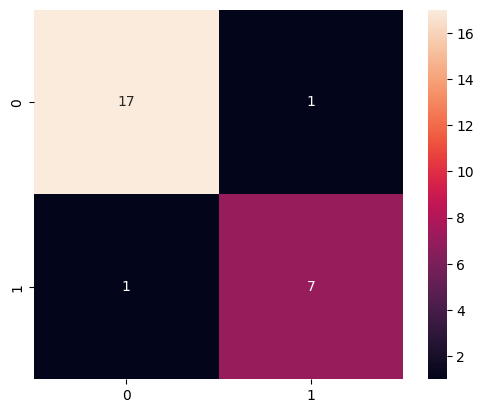

In [50]:
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.imshow(cm)


In [51]:
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Sex_M
0,43.2555,30.8421,25.9025,6.3,1,1
1,45.6033,28.1900,26.2067,13.5,0,0
2,45.0107,28.9677,26.0215,11.7,0,0
3,44.5398,28.9899,26.4703,13.5,0,0
4,43.2870,30.6972,26.0158,12.4,0,1
...,...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,1,0
100,42.2324,30.6757,27.0919,6.3,1,1
101,45.6064,31.9084,22.4852,12.7,0,0
102,45.2095,29.2769,25.5136,13.4,0,1


In [52]:
y_train[0]

array([1])

In [53]:
model=pickle.load(open('nbclassifier.pkl','rb'))

In [54]:
model = pickle.load(open('nbclassifier.pkl', 'rb'))
scaler = pickle.load(open('scaler.pickle', 'rb'))

# Example input data for a single person as strings (these should be numeric)
input_data = ["43.2555", "30.8421", "25.9025", "6.3", "1"]

# Convert the input data to floats
input_data_numeric = np.array([input_data], dtype=float)

# Scale the input data
input_data_scaled = scaler.transform(input_data_numeric)

# Make a prediction
prediction = model.predict(input_data_scaled)

# Output the prediction
output = 'True' if prediction[0] == 1 else 'False'
print("Prediction:", output)

SyntaxError: incomplete input (1571808925.py, line 18)